## 2. Data Exploration

We chose 4 variables from the offensive measures and the other 4 from the defensive measures. Moreover we chose to select comparable data from the two measures; for example, 'Hits', 'Strikeouts' from offensive and 'Hits_Allowed and 'Strikeouts_Allowed' from defensive. These are the 8 variables we explored.

    - Hits
    - Hits_Allowed
    - Runs_Against
    - Runs_Scored
    - Home_Runs
    - Saves
    - Strike_Outs
    - Strikeouts_Allowed
    
These were visualized into histogram and boxplots to see the distribution.

### 2.1 Importing and Cleaning Data

Import pandas, matplotlib libraries and the original data to clean and slice into desired timeframe.

In [275]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [276]:
# Read data and check first five rows
path1 = r"C:\Users\Han\Desktop\York Big Data 2024\Project 1\baseball_teams.csv"
bb = pd.read_csv(path1)
bb.head(5)

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,367,2,42,23,225,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,308,6,28,22,218,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,346,13,53,34,223,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,261,5,21,17,163,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,373,7,42,22,227,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN


In [277]:
# Remove whitespaces in column names.
bb.columns = bb.columns.str.strip()
# Create a new dataframe that only contains data from 1960 to 2010. Check the variables of the data.
bb_1960_2010 = bb[(bb['Year'] >= 1960) & (bb['Year'] < 2010)]
bb_1960_2010.columns.sort_values()

Index(['At_Bats', 'Attendance', 'Caught_Stealing', 'Complete_Games',
       'Division', 'Double_Plays', 'Doubles', 'Earned_Run_Average',
       'Earned_Runs', 'Errors', 'Fielding_Percentage', 'Final_Standing',
       'Franchise', 'Games_Lost', 'Games_Played', 'Games_Won', 'Hit_By_Pitch',
       'Hits', 'Hits_Allowed', 'Home_Ball_Park', 'Home_Run_Allowed',
       'Home_Runs', 'Infield_Put_Outs', 'League', 'League_Win', 'Runs_Against',
       'Runs_Scored', 'Sacrifice_Fly', 'Saves', 'Shutout', 'Stolen_Bases',
       'Strike_Outs', 'Strikeouts_Allowed', 'Team', 'Team_Name', 'Triples',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 7', 'Walks', 'Walks_Allowed',
       'World_Series', 'Year'],
      dtype='object')

In [278]:
# Select the 8 variables and create a list.
selected_variables = ['Hits', 'Hits_Allowed', 'Runs_Against', 'Runs_Scored', 'Home_Runs', 'Saves', 'Strike_Outs', 'Strikeouts_Allowed']
# Split the dataframe that shows only the selected variables.
bb_1960_2010 = bb_1960_2010[selected_variables]
bb_1960_2010.head()

,Hits,Hits_Allowed,Runs_Against,Runs_Scored,Home_Runs,Saves,Strike_Outs,Strikeouts_Allowed
1343,1307,1222,606,682,123,22,801.0,785
1344,1359,1440,775,658,124,23,798.0,767
1345,1402,1338,617,741,112,26,648.0,695
1346,1293,1393,776,634,119,25,897.0,805
1347,1324,1417,692,640,140,35,858.0,740


### 2.2 Descriptive Statistics

Using dataframe.describe() method to extract basic statistical information such as mean, standard deviation, and count from the eight variables.

In [279]:
# Descriptive statistics
desc_stat = pd.DataFrame(bb_1960_2010.describe()).round(2)
print(desc_stat)

          Hits  Hits_Allowed  Runs_Against  Runs_Scored  Home_Runs    Saves  \
count  1282.00       1282.00       1282.00      1282.00    1282.00  1282.00   
mean   1408.57       1408.60        703.29       703.29     142.08    36.07   
std     126.95        129.09        104.15       102.65      40.64     9.41   
min     797.00        827.00        331.00       329.00      32.00    10.00   
25%    1356.25       1350.00        640.00       641.00     112.25    30.00   
50%    1418.50       1422.00        700.50       704.00     139.00    36.00   
75%    1489.00       1490.00        771.00       771.00     168.75    43.00   
max    1684.00       1734.00       1103.00      1009.00     264.00    68.00   

       Strike_Outs  Strikeouts_Allowed  
count      1282.00             1282.00  
mean        927.15              927.15  
std         149.84              153.15  
min         379.00              388.00  
25%         835.25              829.50  
50%         924.00              927.50  
7

### 2.3 Visualizing the Data into Histograms and Box Plots

With matplotlib library, visualize the information into histograms and box plots; perform visual inspection on the shape and distribution.

array([<AxesSubplot:title={'center':'Hits'}>,
       <AxesSubplot:title={'center':'Hits_Allowed'}>,
       <AxesSubplot:title={'center':'Runs_Against'}>,
       <AxesSubplot:title={'center':'Runs_Scored'}>,
       <AxesSubplot:title={'center':'Home_Runs'}>,
       <AxesSubplot:title={'center':'Saves'}>,
       <AxesSubplot:title={'center':'Strike_Outs'}>,
       <AxesSubplot:title={'center':'Strikeouts_Allowed'}>], dtype=object)

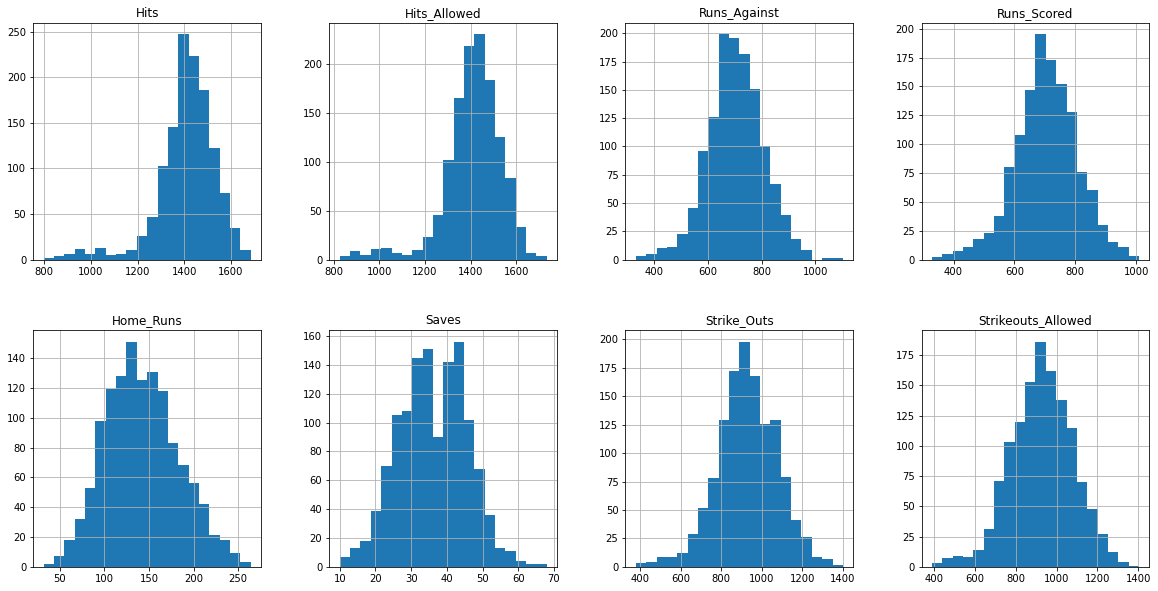

In [280]:
fig, ax = plt.subplots(2, 4, figsize = (20, 10))
bb_1960_2010.hist(ax = ax, bins = 20, sharey = False)

In [321]:
# Defining a method that shows histogram, boxplot, and descriptive statistics of each variable.
# Input is the number of variable in the list 'selected_variables'.
def variable_vis(variable_number):
    fig, ax = plt.subplots(1, 2, figsize = (20, 8), sharex = True)

    ax[0].hist(bb_1960_2010[selected_variables[variable_number]], bins = 15)
    ax[0].set_xlabel(selected_variables[variable_number])
    ax[0].set_ylabel('Count')
    ax[0].set_title('Total ' + str(selected_variables[variable_number]).lower() + ' from 1960 to 2010 (histogram)')

    ax[1].boxplot(bb_1960_2010[selected_variables[variable_number]], vert = False)
    ax[1].set_xlabel(selected_variables[variable_number])
    ax[1].set_ylabel('Count')
    ax[1].set_title('Total ' + str(selected_variables[variable_number]).lower() + ' from 1960 to 2010 (boxplot)')
    
    plt.show()
    stats = pd.DataFrame(desc_stat.iloc[:, variable_number]).transpose()
    stats.rename(columns = {'count' : 'Count', 'mean':'Mean', 'std': 'Std. Deviation', 'min': 'Minimum', 'max':'Maximum'}, inplace = True)
    print(stats)

#### 2.3 (A) Hits 

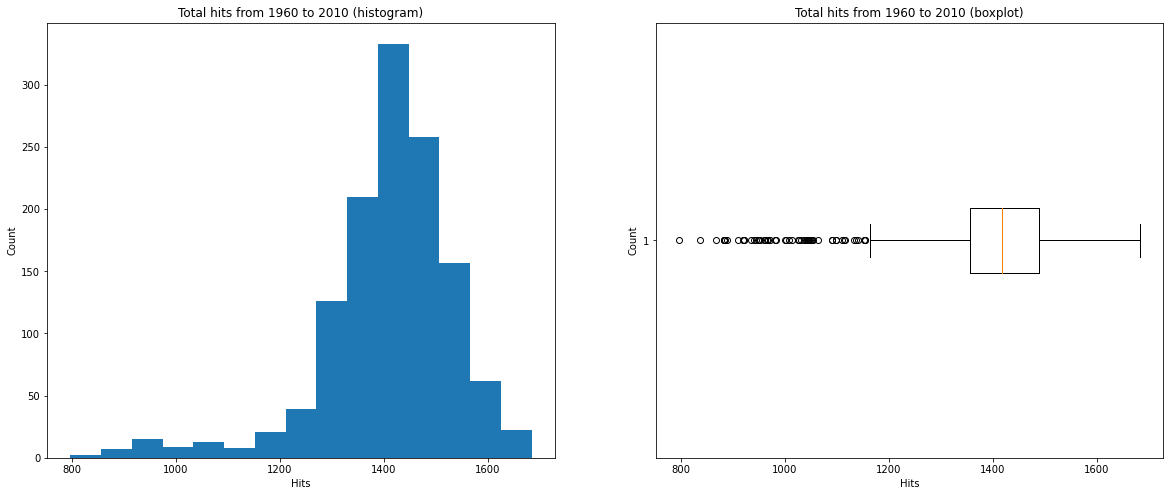

       Count     Mean  Std. Deviation  Minimum      25%     50%     75%  \
Hits  1282.0  1408.57          126.95    797.0  1356.25  1418.5  1489.0   

      Maximum  
Hits   1684.0  


In [322]:
variable_vis(0)

#### Is it symmetric? 
No. The chart is scewed to the left.
##### Is there a single mode?
Inspecting the histogram, there is a single mode at around 1400.
##### Is it narrow or wide?
It is relatively narrow.
##### Are there many outliers?
No. There are not many outliers.

#### 2.3 (B) Hits Allowed

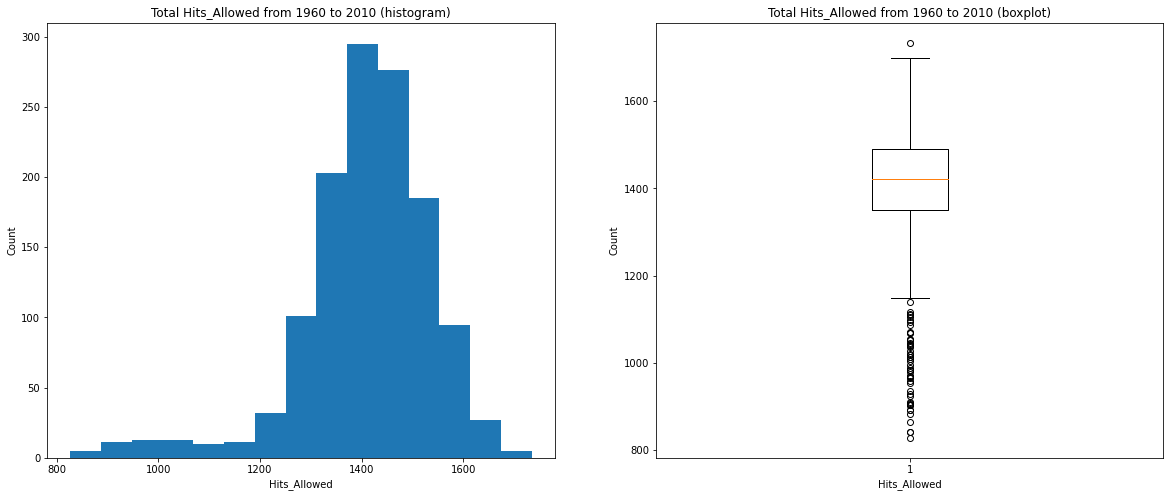

               count    mean     std    min     25%     50%     75%     max
Hits_Allowed  1282.0  1408.6  129.09  827.0  1350.0  1422.0  1490.0  1734.0


In [283]:
variable_vis(1)

##### Is it symmetric?
No. The chart is scewed to the right.
##### Is there a single mode?
Inspecting the histogram, there is a single mode at around 1400.
##### Is it narrow or wide?
It is relatively narrow.
##### Are there many outliers?
Yes. There are not many outliers.

#### 2.3 (C) Runs Against

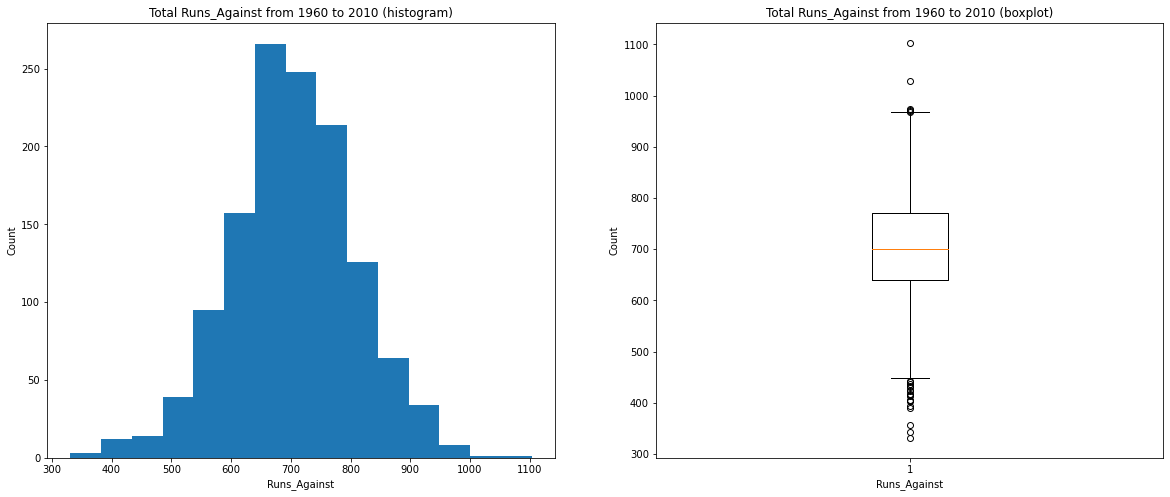

               count    mean     std    min    25%    50%    75%     max
Runs_Against  1282.0  703.29  104.15  331.0  640.0  700.5  771.0  1103.0


In [284]:
variable_vis(2)

##### Is it symmetric?
Yes. It is relatively symmetrical.
##### Is there a single mode?
Inspecting the histogram, there is a single mode at around 1500.
##### Is it narrow or wide?
It is relatively narrow.
##### Are there many outliers?
There are many outliers.

#### 2.3 (D) Runs Scored

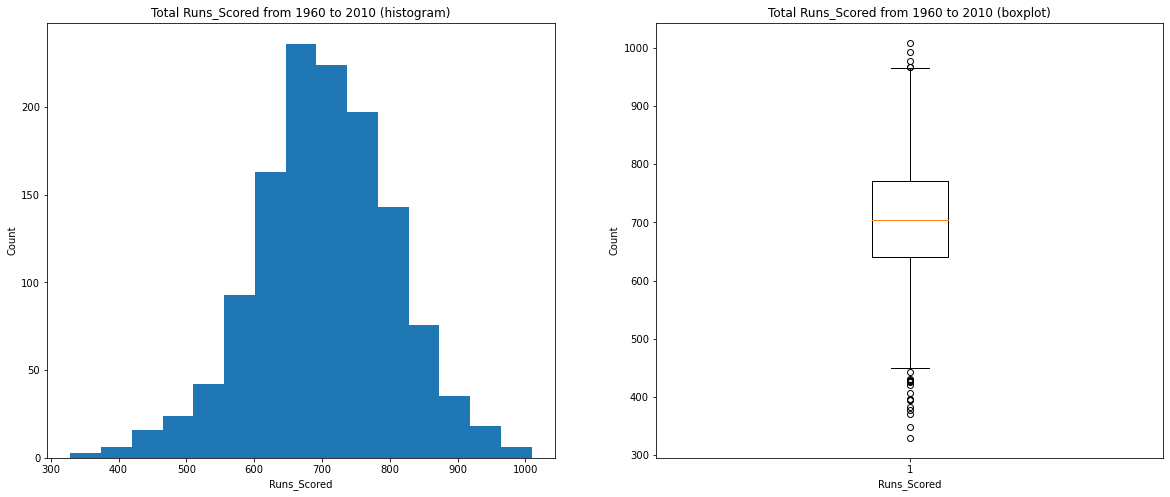

              count    mean     std    min    25%    50%    75%     max
Runs_Scored  1282.0  703.29  102.65  329.0  641.0  704.0  771.0  1009.0


In [285]:
variable_vis(3)

##### Is it symmetric?
Yes.
##### Is there a single mode?
Inspecting the histogram, there is a single mode at around 1400.
##### Is it narrow or wide?
Inspecting the histogram, there is a single mode at around 1400.
##### Are there many outliers?
Yes. There are many outliers.

### 2.3 (E) Home Runs

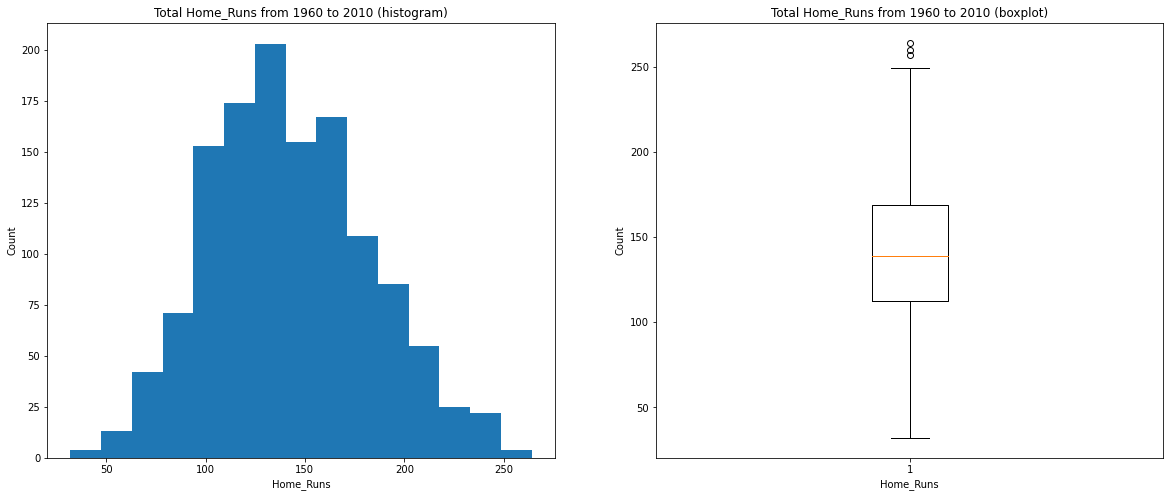

            count    mean    std   min     25%    50%     75%    max
Home_Runs  1282.0  142.08  40.64  32.0  112.25  139.0  168.75  264.0


In [286]:
variable_vis(4)

##### Is it symmetric?
No.
##### Is there a single mode?
No.
##### Is it narrow or wide?
It is wide.
##### Are there many outliers?
There are few outliers.

### 2.3 (F) Saves

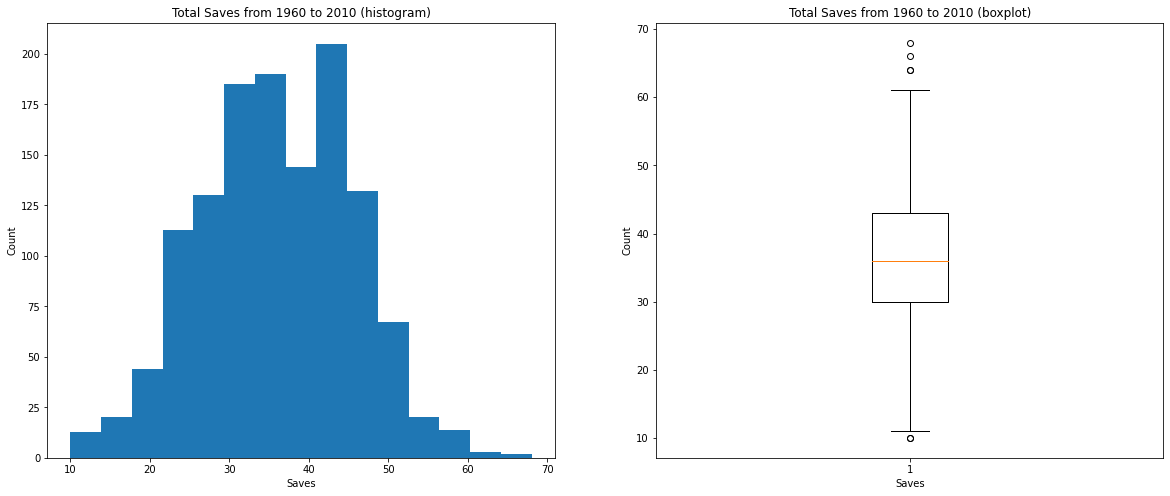

        count   mean   std   min   25%   50%   75%   max
Saves  1282.0  36.07  9.41  10.0  30.0  36.0  43.0  68.0


In [287]:
variable_vis(5)

##### Is it symmetric?
No.
##### Is there a single mode?
No.
##### Is it narrow or wide?
It is narrow.
##### Are there many outliers?
No. There are not many outliers.

### 2.3 (G) Strike Outs

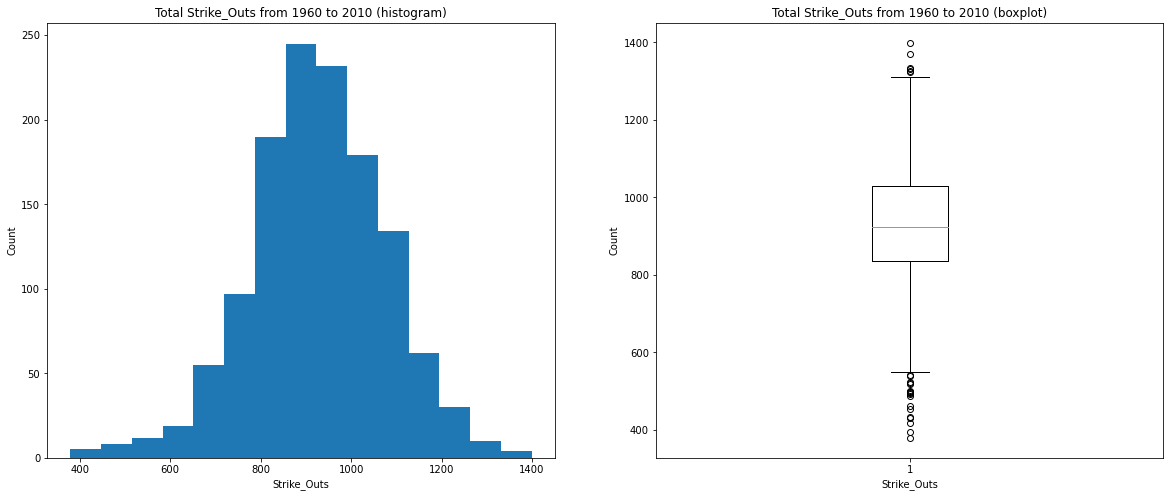

              count    mean     std    min     25%    50%     75%     max
Strike_Outs  1282.0  927.15  149.84  379.0  835.25  924.0  1030.0  1399.0


In [288]:
variable_vis(6)

##### Is it symmetric?
Yes.
##### Is there a single mode?
Yes, at around 900.
##### Is it narrow or wide?
It is narrow.
##### Are there many outliers?
There are many outliers.

### 2.3 (H) Strikeouts Allowed

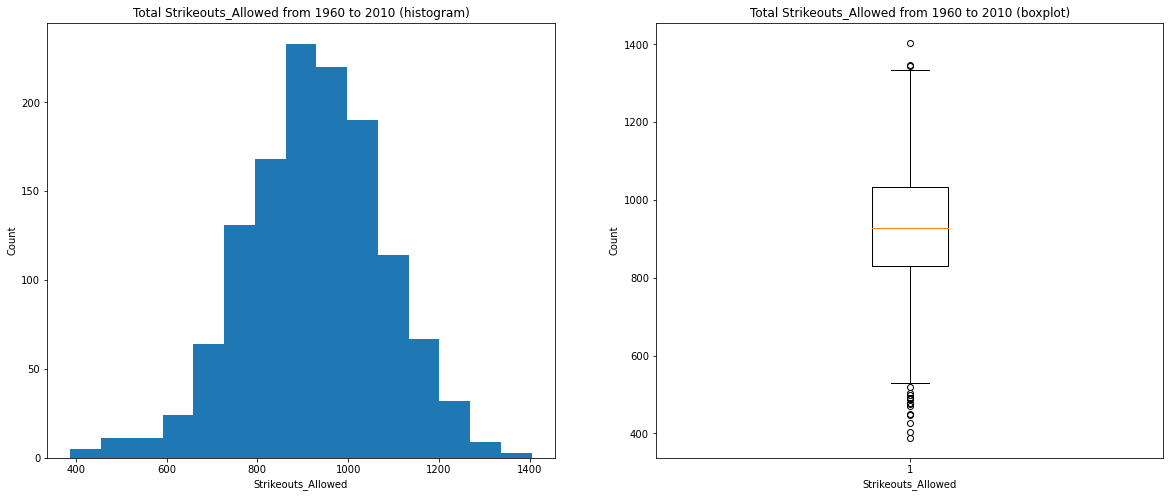

                     count    mean     std    min    25%    50%     75%  \
Strikeouts_Allowed  1282.0  927.15  153.15  388.0  829.5  927.5  1033.0   

                       max  
Strikeouts_Allowed  1404.0  


In [289]:
variable_vis(7)

##### Is it symmetric?
Yes.
##### Is there a single mode?
Yes, at around 900.
##### Is it narrow or wide?
It is narrow.
##### Are there many outliers?
Yes. There are many outliers.